In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

aviation_accidents_df = pd.read_csv('NTSBAviationData.csv', encoding="latin1")

print(aviation_accidents_df.shape)
aviation_accidents_df.head(10)

(88889, 31)


/var/folders/_g/czxw4yqj0kg0qqtcpbwnjhb00000gn/T/ipykernel_53441/3117999170.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_accidents_df = pd.read_csv('NTSBAviationData.csv', encoding="latin1")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [2]:
# inspects the data type of each column 
aviation_accidents_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [3]:
# converts columns to suitable data types
date_cols = ["Event.Date", "Publication.Date"]
for col in date_cols:
    aviation_accidents_df[col] = pd.to_datetime(aviation_accidents_df[col],errors="coerce")

categorical_cols = [
    "Investigation.Type", "Injury.Severity", "Aircraft.damage",
    "Aircraft.Category", "Amateur.Built", "Engine.Type",
    "FAR.Description", "Schedule", "Purpose.of.flight",
    "Weather.Condition", "Broad.phase.of.flight", "Report.Status"
]
for col in categorical_cols:
    aviation_accidents_df[col] = aviation_accidents_df[col].astype("category")

/var/folders/_g/czxw4yqj0kg0qqtcpbwnjhb00000gn/T/ipykernel_53441/1827722920.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aviation_accidents_df[col] = pd.to_datetime(aviation_accidents_df[col],errors="coerce")


In [4]:
# inspects the data type of each column after converting to suitable data types
aviation_accidents_df.dtypes

Event.Id                          object
Investigation.Type              category
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                 category
Aircraft.damage                 category
Aircraft.Category               category
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                   category
Number.of.Engines                float64
Engine.Type                     category
FAR.Description                 category
Schedule                        category
Purpose.of.flight               category
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

In [5]:
# counts how many columns in the dataset have missing values
num_columns_missing_values = aviation_accidents_df.isnull().any().sum()
print("Number of columns with missing values: ", num_columns_missing_values, "columns")
print()

# reports the percent of missing values in each column
print("Percent of missing values in each column:")
print(aviation_accidents_df.isnull().mean() * 100)

Number of columns with missing values:  27 columns

Percent of missing values in each column:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.

In [6]:
# removes the columns containing 50% or more missing data except for the 'Aircraft.Category' type
aviation_accidents_df = aviation_accidents_df.loc[:, (aviation_accidents_df.isnull().mean() < 0.5) | (aviation_accidents_df.columns == 'Aircraft.Category')]

In [7]:
# checks shape of dataset post deletion 
print(aviation_accidents_df.shape)
print()

# reports the percent of missing values in each column
print("Percent of missing values in each column:")
print(aviation_accidents_df.isnull().mean() * 100)

(88889, 26)

Percent of missing values in each column:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30.560587
Report.Status              7.181991
Publication.Date          15.492356
dtype: fl

In [8]:
# count the frequency of missing values in each row
aviation_accidents_df.isnull().sum(axis = 1).sort_values(ascending = False)  

58803    17
49759    16
53640    16
50016    16
61405    15
         ..
1510      0
1507      0
3455      0
1499      0
2591      0
Length: 88889, dtype: int64

In [9]:
# delete rows with 50% of more of its data missing
aviation_accidents_df = aviation_accidents_df[aviation_accidents_df.isnull().mean(axis = 1) <= 0.5]

In [10]:
# check shape of dataset post deletion 
aviation_accidents_df.shape

(88820, 26)

In [11]:
# count the frequency of missing values in each row post deletion
aviation_accidents_df.isnull().sum(axis = 1).sort_values(ascending = False)  

62477    13
61992    13
52963    13
63697    13
46580    13
         ..
1510      0
3455      0
1507      0
1499      0
2591      0
Length: 88820, dtype: int64

In [12]:
# reports the percent of missing values in each column after deletion
print("Percent of missing values in each column:")
print(aviation_accidents_df.isnull().mean() * 100)

Percent of missing values in each column:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.052916
Country                    0.251070
Airport.Code              43.557757
Airport.Name              40.662013
Injury.Severity            1.123621
Aircraft.damage            3.541995
Aircraft.Category         63.654582
Registration.Number        1.479397
Make                       0.065301
Model                      0.096825
Amateur.Built              0.077685
Number.of.Engines          6.772123
Engine.Type                7.911506
Purpose.of.flight          6.894844
Total.Fatal.Injuries      12.761765
Total.Serious.Injuries    14.009232
Total.Minor.Injuries      13.359604
Total.Uninjured            6.585229
Weather.Condition          4.979734
Broad.phase.of.flight     30.506643
Report.Status              7.185319
Publication.Date          15.496510
dtype: float64


In [13]:
# perform imputation in columns with missing values

# replaces missing values in columns with object data type
object_missing_cols = ['Location', 'Country','Airport.Code', 'Airport.Name', 'Registration.Number', 'Make', 'Model']

for col in object_missing_cols:
    top_val = aviation_accidents_df[col].mode()[0]
    aviation_accidents_df[col] = aviation_accidents_df[col].fillna(top_val)

In [14]:
# reports the percent of missing values in each column after imputation
print("Percent of missing values in each column:")
print(aviation_accidents_df.isnull().mean() * 100)

Percent of missing values in each column:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Airport.Code               0.000000
Airport.Name               0.000000
Injury.Severity            1.123621
Aircraft.damage            3.541995
Aircraft.Category         63.654582
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.077685
Number.of.Engines          6.772123
Engine.Type                7.911506
Purpose.of.flight          6.894844
Total.Fatal.Injuries      12.761765
Total.Serious.Injuries    14.009232
Total.Minor.Injuries      13.359604
Total.Uninjured            6.585229
Weather.Condition          4.979734
Broad.phase.of.flight     30.506643
Report.Status              7.185319
Publication.Date          15.496510
dtype: float64


In [15]:
# replaces missing values in categorical columns with top value 

categorical_missing_cols = ['Injury.Severity', 'Aircraft.damage', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
                            'Broad.phase.of.flight', 'Report.Status']

for col in categorical_missing_cols:
    top_val_column = aviation_accidents_df[col].mode()[0]
    aviation_accidents_df[col] = aviation_accidents_df[col].fillna(top_val_column)

In [16]:
# reports the percent of missing values in each column after imputation
print("Percent of missing values in each column:")
print(aviation_accidents_df.isnull().mean() * 100)

Percent of missing values in each column:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Airport.Code               0.000000
Airport.Name               0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category         63.654582
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          6.772123
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries      12.761765
Total.Serious.Injuries    14.009232
Total.Minor.Injuries      13.359604
Total.Uninjured            6.585229
Weather.Condition          0.000000
Broad.phase.of.flight      0.000000
Report.Status              0.000000
Publication.Date          15.496510
dtype: float64


In [17]:
# replaces missing values in categorical columns with mean value  
numerical_missing_cols = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

for col in numerical_missing_cols:
    top_val_column = aviation_accidents_df[col].mean()
    aviation_accidents_df[col] = aviation_accidents_df[col].fillna(top_val_column)

In [18]:
# reports the percent of missing values in each column after imputation
print("Percent of missing values in each column:")
print(aviation_accidents_df.isnull().mean() * 100)

Percent of missing values in each column:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Airport.Code               0.000000
Airport.Name               0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category         63.654582
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Broad.phase.of.flight      0.000000
Report.Status              0.000000
Publication.Date          15.496510
dtype: float64


In [19]:
# finds most frequent value of 'Publication.Date' column
aviation_accidents_df['Publication.Date'].value_counts(dropna = False)

Publication.Date
2020-09-25    17018
NaT           13764
2020-09-26     1769
2020-11-03     1154
1993-03-31      452
              ...  
2001-06-13        1
2008-12-29        1
2001-04-02        1
2002-12-18        1
2022-12-29        1
Name: count, Length: 2910, dtype: int64

In [20]:
# replaces missing value in 'Publication.Date' column with top value 
aviation_accidents_df['Publication.Date'] = aviation_accidents_df['Publication.Date'].fillna(pd.to_datetime("2020-09-25"))

In [21]:
# reports the percent of missing values in each column after all imputation
print("Percent of missing values in each column:")
print(aviation_accidents_df.isnull().mean() * 100)

Percent of missing values in each column:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Airport.Code               0.000000
Airport.Name               0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category         63.654582
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Broad.phase.of.flight      0.000000
Report.Status              0.000000
Publication.Date           0.000000
dtype: float64


In [22]:
# deletes the rows where there are missing values in the 'Aircraft.Category'
aviation_accidents_df = aviation_accidents_df[~aviation_accidents_df['Aircraft.Category'].isnull()]

In [23]:
# reports the percent of missing values in each column after all steps of imputation
print("Percent of missing values in each column:")
print(aviation_accidents_df.isnull().mean() * 100)

Percent of missing values in each column:
Event.Id                  0.0
Investigation.Type        0.0
Accident.Number           0.0
Event.Date                0.0
Location                  0.0
Country                   0.0
Airport.Code              0.0
Airport.Name              0.0
Injury.Severity           0.0
Aircraft.damage           0.0
Aircraft.Category         0.0
Registration.Number       0.0
Make                      0.0
Model                     0.0
Amateur.Built             0.0
Number.of.Engines         0.0
Engine.Type               0.0
Purpose.of.flight         0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           0.0
Weather.Condition         0.0
Broad.phase.of.flight     0.0
Report.Status             0.0
Publication.Date          0.0
dtype: float64


In [24]:
# checks unique values in the 'Make' column
aviation_accidents_df['Make'].value_counts(ascending = False)

Make
CESSNA                           4867
Cessna                           3620
PIPER                            2805
Piper                            1910
BOEING                           1039
                                 ... 
HOLMGREEN JOHN B                    1
Advertising MGMT & Consulting       1
TURCK G L/DUFLO J T                 1
Kirkpatrick                         1
ORLICAN S R O                       1
Name: count, Length: 4668, dtype: int64

In [25]:
# makes all values in the 'Aircraft.Category' lowercase to account for different capitalization and duplicates of different cases
aviation_accidents_df['Make'] = aviation_accidents_df['Make'].str.lower()

In [26]:
# checks unique values in the 'Make' column after addressing duplicate values
aviation_accidents_df['Make'].value_counts(ascending = False)

Make
cessna              8487
piper               4715
beech               1691
boeing              1323
bell                 912
                    ... 
wilde daniel l         1
hummel / finberg       1
ashcraft               1
schneider              1
orlican s r o          1
Name: count, Length: 4210, dtype: int64

#### Visualizes the distribution of Weather Conditions and displays which weather conditions contributed to the severity of injury

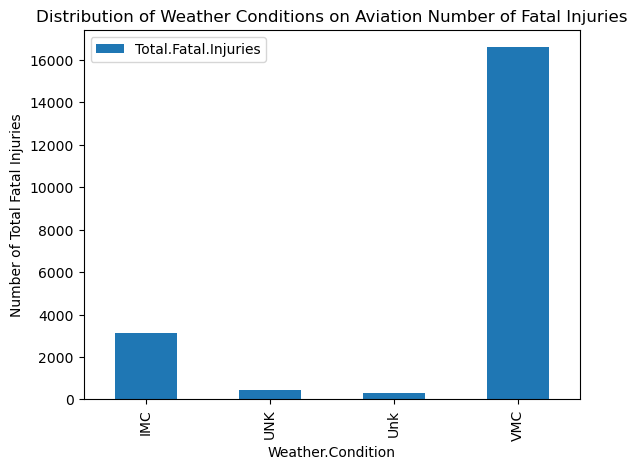

In [27]:
# counts the number of admissions for each weather condition
weather_condition_injury = aviation_accidents_df.groupby(['Weather.Condition'], as_index = False, observed = True)['Total.Fatal.Injuries'].sum()

# displays the number of admissions for each  program category
weather_condition_injury

weather_condition_injury.plot.bar(x = 'Weather.Condition', y = 'Total.Fatal.Injuries')
plt.title('Distribution of Weather Conditions on Aviation Number of Fatal Injuries')
plt.ylabel('Number of Total Fatal Injuries')
plt.show()

According to the bar plot above, which displays how specific weather conditions affected the number of total fatal aviation injuries, the highest number of fatal injuries occured when the weather condition was VMC, which had over 16,000 fatal injuries. For context, VMC in weather conditions refers to when the weather conditions meet the minimum visibility, ceiling, and distance from clouds required for Visual Flight Rules (VFR) flight. So essentially, this observation tells us that the highest number of total fatal injuries are occuring when the weather appears safe for flight, which is contrary to what we expected (since we assumed that most fatal aviation injuries would be happening in bad weather). There is a significant difference between the number of fatal injuries when the weather condition is VMC versus when the weather condition is IMC, which is the weather condition that has the second highest number of fatal injuries. For context, IMC stands for weather conditions that do not meet the minimum requirements for VFR, and there were around 3,000 fatal injuries when the weather condition was IMC - a significantly lower value than that of VMC, which is a bit surprising. Lastly, around 500 fatal injuries happened when the weather was Unknown, represented by the 'UNK' and 'Unk' values. Overall, the results of this bar plot were somewhat surprising as it revealed that most fatal injuries happened when the weather conditions were considered safe for flight. 

#### Investigate the combinations of factors that create the highest risk

In [28]:
# find the top 10 combinations that create the highest aviation risk 
combination_highest_risk = aviation_accidents_df.groupby(['Weather.Condition', 'Purpose.of.flight', 'Aircraft.Category'], as_index = False, observed = True)['Total.Fatal.Injuries'].sum()
combination_highest_risk = combination_highest_risk.sort_values('Total.Fatal.Injuries', ascending = False).head(10)
print(combination_highest_risk)

    Weather.Condition   Purpose.of.flight Aircraft.Category  \
128               VMC            Personal          Airplane   
17                IMC            Personal          Airplane   
132               VMC            Personal        Helicopter   
158               VMC             Unknown          Airplane   
108               VMC       Instructional          Airplane   
34                IMC             Unknown          Airplane   
45                UNK             Unknown          Airplane   
85                VMC            Business          Airplane   
68                VMC  Aerial Application          Airplane   
156               VMC           Skydiving          Airplane   

     Total.Fatal.Injuries  
128          11396.506046  
17            1930.559592  
132            927.636097  
158            870.559592  
108            819.277873  
34             523.404995  
45             354.136891  
85             299.792282  
68             242.041092  
156            229.930761 

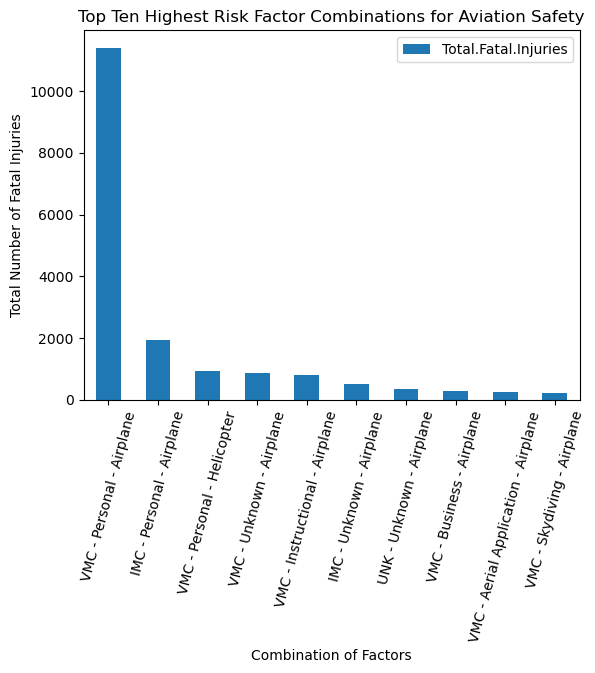

In [29]:
# visualize these results onto a bar plot
combination_highest_risk['Combination of Factors'] = (combination_highest_risk['Weather.Condition'].astype(str) + ' - ' +
                                                       combination_highest_risk['Purpose.of.flight'].astype(str) + ' - ' +
                                                       combination_highest_risk['Aircraft.Category'].astype(str))

combination_highest_risk.plot.bar(x = 'Combination of Factors', y ='Total.Fatal.Injuries')
plt.xticks(rotation = 75)
plt.ylabel('Total Number of Fatal Injuries')
plt.title('Top Ten Highest Risk Factor Combinations for Aviation Safety')
plt.show()

In this problem, I defined highest risk as having the highest number of fatal injuries. In this bar plot, I examined the relationship between aviation risk (number of fatal injuries) and the top 10 different combinations of Weather Conditions, Purpose of flight, and Type of Aircraft and found that the combination with the highest risk factor, or in other words, highest number of fatal injuries, was when the Weather Condition was VMC (weather met the minimum requirements for flight), the Purpose of flight was Personal, and the Type of Aircraft was Airplane, and this combination had almost 12,000 fatal injuries. On the other hand, the combination with the tenth lowest risk factor was when the weather condition was VMC, the purpose of flight was Skydiving, and when the type of Aircraft was Airplane, which had around 200 fatal injuries. The combination with the second highest risk factor, which had nearly 2,000 fatal injuries, was when the Weather condition was IMC, purpose of flight was Personal, and type of Aircraft was Airplane. From looking at the plot, the combinations with the top three highest risk factors all had the purpose of flight being Personal, and across the top 10 combinations with the highest risk factors, most (7/10) of the combinations involved VMC weather conditions. 

In [30]:
# find the top 10 combinations that create the highest aviation risk 
combination_highest_risk_more = aviation_accidents_df.groupby(['Weather.Condition', 'Purpose.of.flight', 'Aircraft.Category', 'Make', 'Engine.Type'], as_index = False, observed = True)['Total.Fatal.Injuries'].sum()
combination_highest_risk_more = combination_highest_risk_more.sort_values('Total.Fatal.Injuries', ascending = False).head(10)
print(combination_highest_risk_more)

     Weather.Condition Purpose.of.flight Aircraft.Category    Make  \
2362               VMC          Personal          Airplane  boeing   
2553               VMC          Personal          Airplane  cessna   
4261               VMC          Personal          Airplane   piper   
2099               VMC          Personal          Airplane  airbus   
2290               VMC          Personal          Airplane   beech   
143                IMC          Personal          Airplane  cessna   
1544               VMC     Instructional          Airplane  cessna   
2100               VMC          Personal          Airplane  airbus   
245                IMC          Personal          Airplane   piper   
6187               VMC           Unknown          Airplane  boeing   

        Engine.Type  Total.Fatal.Injuries  
2362  Reciprocating           2090.396141  
2553  Reciprocating           2001.283552  
4261  Reciprocating           1250.167542  
2099  Reciprocating            863.646538  
2290  Rec

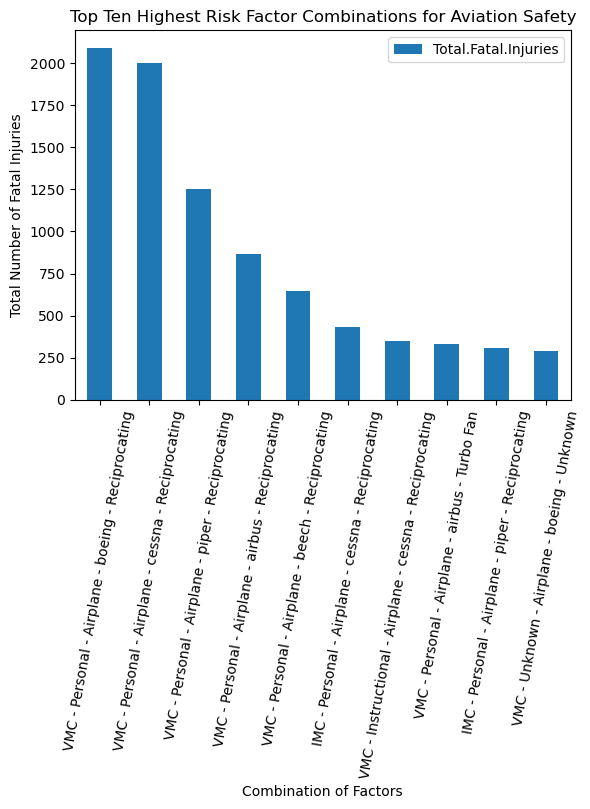

In [31]:
# visualize these results onto a bar plot
combination_highest_risk_more['Combination of Factors'] = (combination_highest_risk_more['Weather.Condition'].astype(str) + ' - ' +
                                                           combination_highest_risk_more['Purpose.of.flight'].astype(str) + ' - ' +
                                                           combination_highest_risk_more['Aircraft.Category'].astype(str) + ' - ' +
                                                           combination_highest_risk_more['Make'] + ' - ' +
                                                           combination_highest_risk_more['Engine.Type'].astype(str))

combination_highest_risk_more.plot.bar(x = 'Combination of Factors', y ='Total.Fatal.Injuries')
plt.xticks(rotation = 80)
plt.ylabel('Total Number of Fatal Injuries')
plt.title('Top Ten Highest Risk Factor Combinations for Aviation Safety')
plt.show()

In this bar plot, I extended the results of the previous bar plot by examining the relationship between risk factor (number of fatal injuries) and the top 10 different combinations of Weather Condition, Purpose of flight, Type of Aircraft, Make, and Engine Type. According to the bar plot, the combination with the highest risk factor was when the weather condition was VMC, purpose of flight was Personal, type of aircraft was Airplane, make of the aircraft was Boeing, and engine type was Reciprocating, and this combination had a little over 2,000 total fatal injuries. The combination with the second highest risk factor was when the weather condition was VMC, purpose of flight was Personal, type of aircraft was Airplane, make of the aircraft was Cessna, and engine type was Reciprocating, and this combination had almost 2,000 total fatal injuries. On the other hand, the combination with the tenth highest risk factor was when the weather condition was VMC, purpose of flight was Unknown, type of aircraft was Airplane, make of aircraft was Boeing, and the engine type was Unknown, and this combination had around 300 total fatal injuries. Based on the bar plot, almost all of these 10 combinations with the highest risk factors had a Reciprocating engine type, which suggests that there might exist some correlation between reciprocating engines and aviation safety risk (number of fatal injuries), yet more analysis and information would be needed to be certain. In addition, all 10 combinations involved the type of aircraft being Airplanes and almost all combinations involved the flights being conducted for Personal purposes. Most of the combinations had VMC weather conditions, as opposed to IMC which was only in 2 out of the 10 combinations seen.

In [32]:
# extracts the year of each event date
aviation_accidents_df['Year'] = pd.to_datetime(aviation_accidents_df['Event.Date']).dt.year
engine_type_injury_by_year = aviation_accidents_df.groupby(['Year', 'Engine.Type'], as_index=False, observed=True)['Total.Fatal.Injuries'].sum()

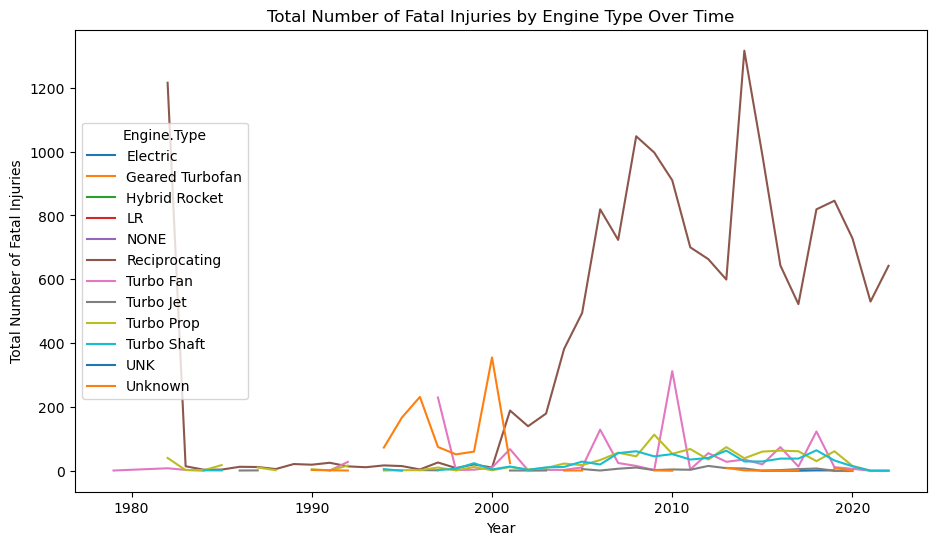

In [33]:
# visualizes the findings
pivot_engine_type_injury_df = engine_type_injury_by_year.pivot(index='Year', columns='Engine.Type', values='Total.Fatal.Injuries')
pivot_engine_type_injury_df.plot(figsize=(11, 6), title = 'Total Number of Fatal Injuries by Engine Type Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Fatal Injuries')
plt.show()

The above bar plot displays the relationships between risk factor (number of fatal injuries) and the aircraft engine type, and how the relationships have evolved over time from 1980 to 2020 (over 40 years). The plot displays that the Reciprocrating engine type has almost always been the engine type with the significantly highest number of fatal injuries compared to the other engine types over time, which suggest there may be a link netween reciprocrating engines and risk factor. Geared Turbofan and Turbo Fan engines follow after it with the second and third highest number of fatal injuries, but have significantly less than the Reciprocrating engine type. For the different engine types, the risk seemed to have spike during different times, with risk spiking in 2000 for Geared Turbofan engines and 2010 for Turbo Fan engines. Although Reciprocating engines experienced its spike in 2015 with almost 1,400 fatal injuries, it had roughly 1,200 fatal injuries in 1985, which is worth noting. For all the engine types, the risk (number of fatal injuries) for the most part has steadily dropped over time or remained stagnant, besides the Reciprocrating engine, where the risk is less than what it was at its spike, but it currently seems to be increasing starting in 2020. 

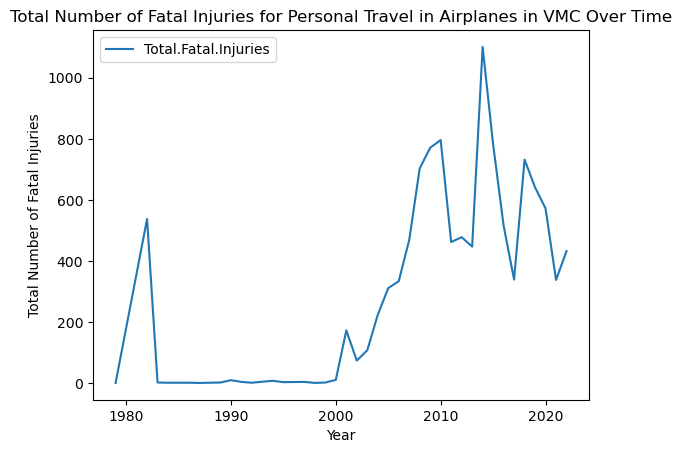

In [37]:
risk_factors_combination = aviation_accidents_df.groupby(['Year', 'Weather.Condition', 'Aircraft.Category', 'Purpose.of.flight'], as_index = False, observed = True)['Total.Fatal.Injuries'].sum()
risk_factors_combination_values = risk_factors_combination[(risk_factors_combination['Weather.Condition'] == 'VMC') & (risk_factors_combination['Aircraft.Category'] == 'Airplane') & (risk_factors_combination['Purpose.of.flight'] == 'Personal')]

risk_factors_combination_values.plot(x = 'Year', y = 'Total.Fatal.Injuries', title = 'Total Number of Fatal Injuries for Personal Travel in Airplanes in VMC Over Time')
plt.ylabel('Total Number of Fatal Injuries')
plt.show()

The bar plot examines the specific risk of personal travel in airplanes in VMC weather conditions over 40 years from 1980 to 2020 and illustrates how that risk has evolved over time. It shows that the risk (total number of fatal injuries) spiked in  2015, at 1,100 total fatal injuries in 2015. From 1978 to 1983, the number of fatal injuries observed some spike at 550, and from 1983 to 2000, the number was mostly stagnant at 0, however, from 2000 to 2015, it increased for the most part and experienced its spike. From 2015 to present, the total fatal injuries was fluctuating between dropping and increasing, but dropping for the most part and went down to 350 injuries in 2020, but it currently seems to be slightly increasing since then. 

Overall, the 5 visualizations helped me identify that the specific combination of factors that reveal the highest risk (highest number of fatal injuries) is when the weather condition is VMC, the purpose of flight is Personal, and the the type of aircraft is Airplane, with almost 12,000 fatal injuries. Looking more specifically at the combination with Weather Conditions, Purpose of flight, Aircraft Category, Aircraft Make, and Engine Type, I found that the combination that revealed the highest risk is when the weather condition is VMC, purpose of flight is Personal, type of aircraft is Airplane, aircraft make is Boeing, and engine type is Reciprocating, with a little over 2,000 fatal injuries. Based on the visualizations I created that display risk evolution over time, it seems like the risk for Reciprocating engines is slightly on the rise since 2020, while the risk for Personal travel in Airplanes in VMC weather conditions seems to be on the slight rise too since 2020. 